In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
df.shape

(45000, 14)

In [4]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [5]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

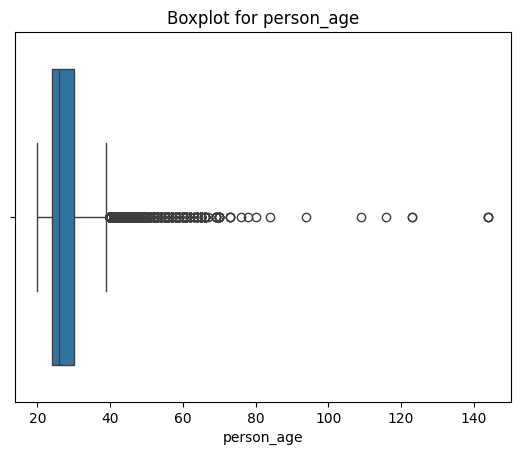

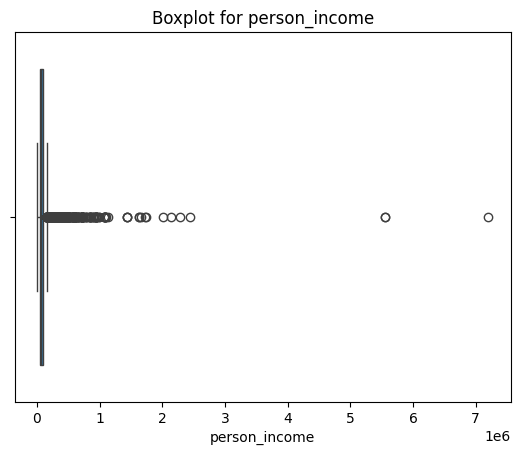

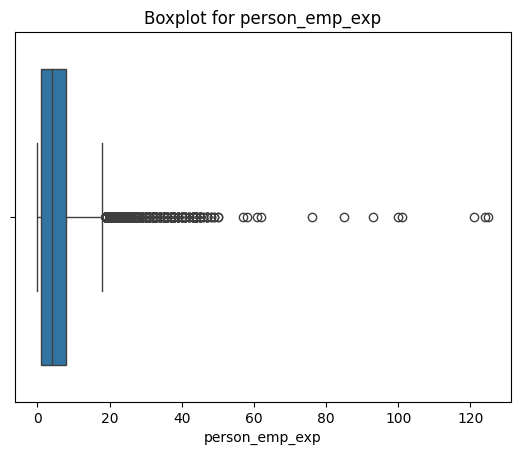

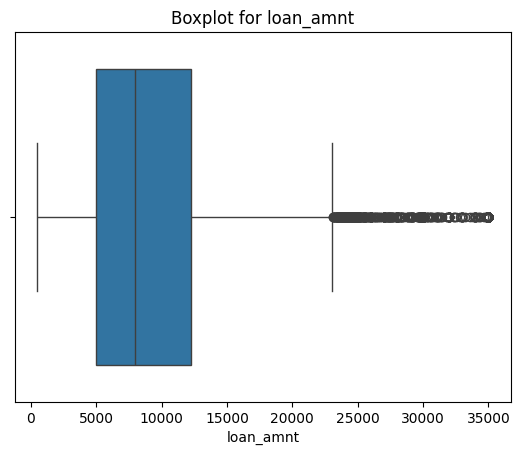

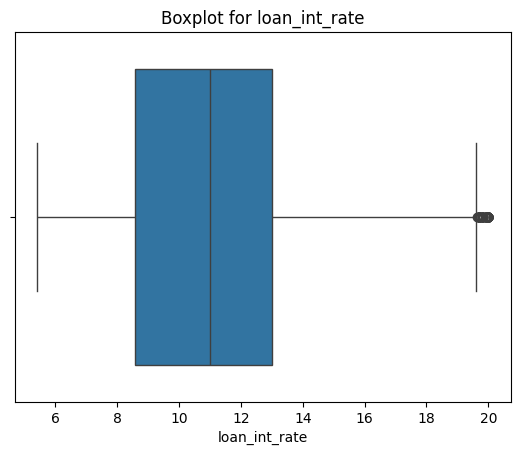

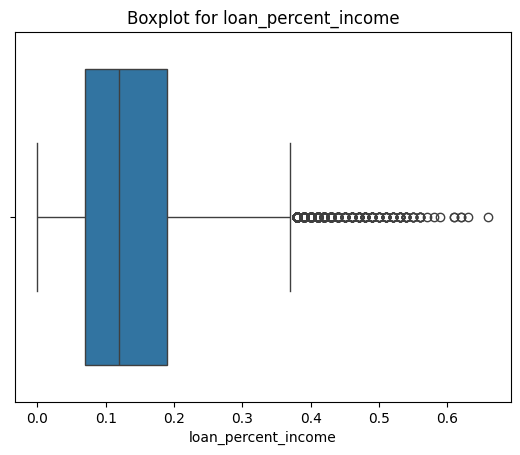

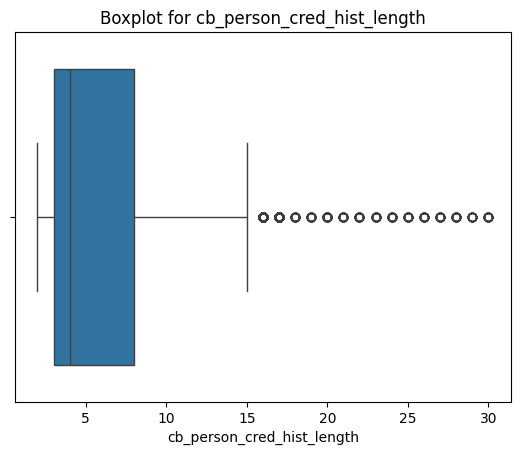

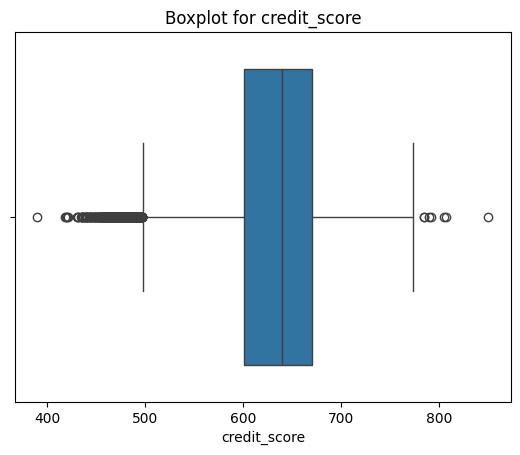

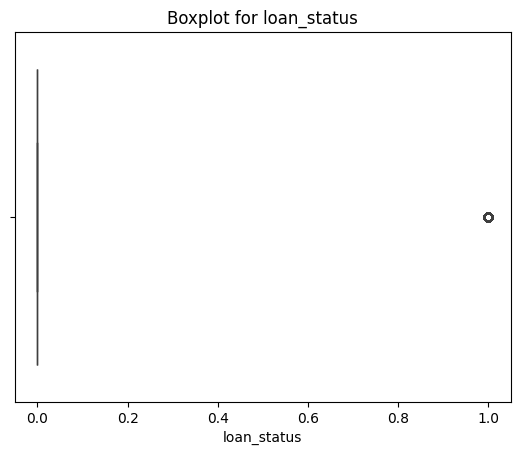

In [8]:
numeric_cols=df.select_dtypes(include=['int64','float64'])
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [9]:
df=df[(df['person_age']>=18) & (df['person_age']<=70)]
df.shape

(44985, 14)

In [10]:
df['person_gender']=df['person_gender'].map({'male':0,'female':1})
print(df['person_gender'])


0        1
1        1
2        1
3        1
4        0
        ..
44995    0
44996    1
44997    0
44998    0
44999    0
Name: person_gender, Length: 44985, dtype: int64


In [11]:
df['previous_loan_defaults_on_file']=df['previous_loan_defaults_on_file'].map({'Yes':1,'No':0})
print(df['previous_loan_defaults_on_file'])


0        0
1        1
2        0
3        0
4        0
        ..
44995    0
44996    0
44997    0
44998    0
44999    0
Name: previous_loan_defaults_on_file, Length: 44985, dtype: int64


In [12]:
df['person_education'].value_counts()

person_education
Bachelor       13393
Associate      12024
High School    11967
Master          6980
Doctorate        621
Name: count, dtype: int64

In [13]:
education_order={
    'High School':1,
    'Associate':2,
    'Bachelor':3,
    'Master':4,
    'Doctorate':5
}
df['person_education']=df['person_education'].map(education_order)
df['person_education']

0        4
1        1
2        1
3        3
4        4
        ..
44995    2
44996    2
44997    2
44998    3
44999    1
Name: person_education, Length: 44985, dtype: int64

In [14]:
df['person_home_ownership'].value_counts()

person_home_ownership
RENT        23434
MORTGAGE    18483
OWN          2951
OTHER         117
Name: count, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

multi_cols = ['person_home_ownership', 'loan_intent']

le = LabelEncoder()
for col in multi_cols:
    df[col] = le.fit_transform(df[col])


In [16]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,1,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,1,1,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,1,1,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,1,3,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,0,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


In [17]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42,max_depth=None,n_estimators=300)
rf.fit(xtrain,ytrain)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
y_pred = rf.predict(xtest)

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,f1_score,recall_score

print("Accuracy:", accuracy_score(ytest, y_pred))
print("Confusion Matrix:", confusion_matrix(ytest, y_pred))
print("Classification Report:", classification_report(ytest, y_pred))

Accuracy: 0.9291986217628099
Confusion Matrix: [[6797  190]
 [ 447 1563]]
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6987
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      8997
   macro avg       0.91      0.88      0.89      8997
weighted avg       0.93      0.93      0.93      8997



In [22]:
import pickle as pkl
pkl.dump(rf,open('loan_status.pkl','wb'))